[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


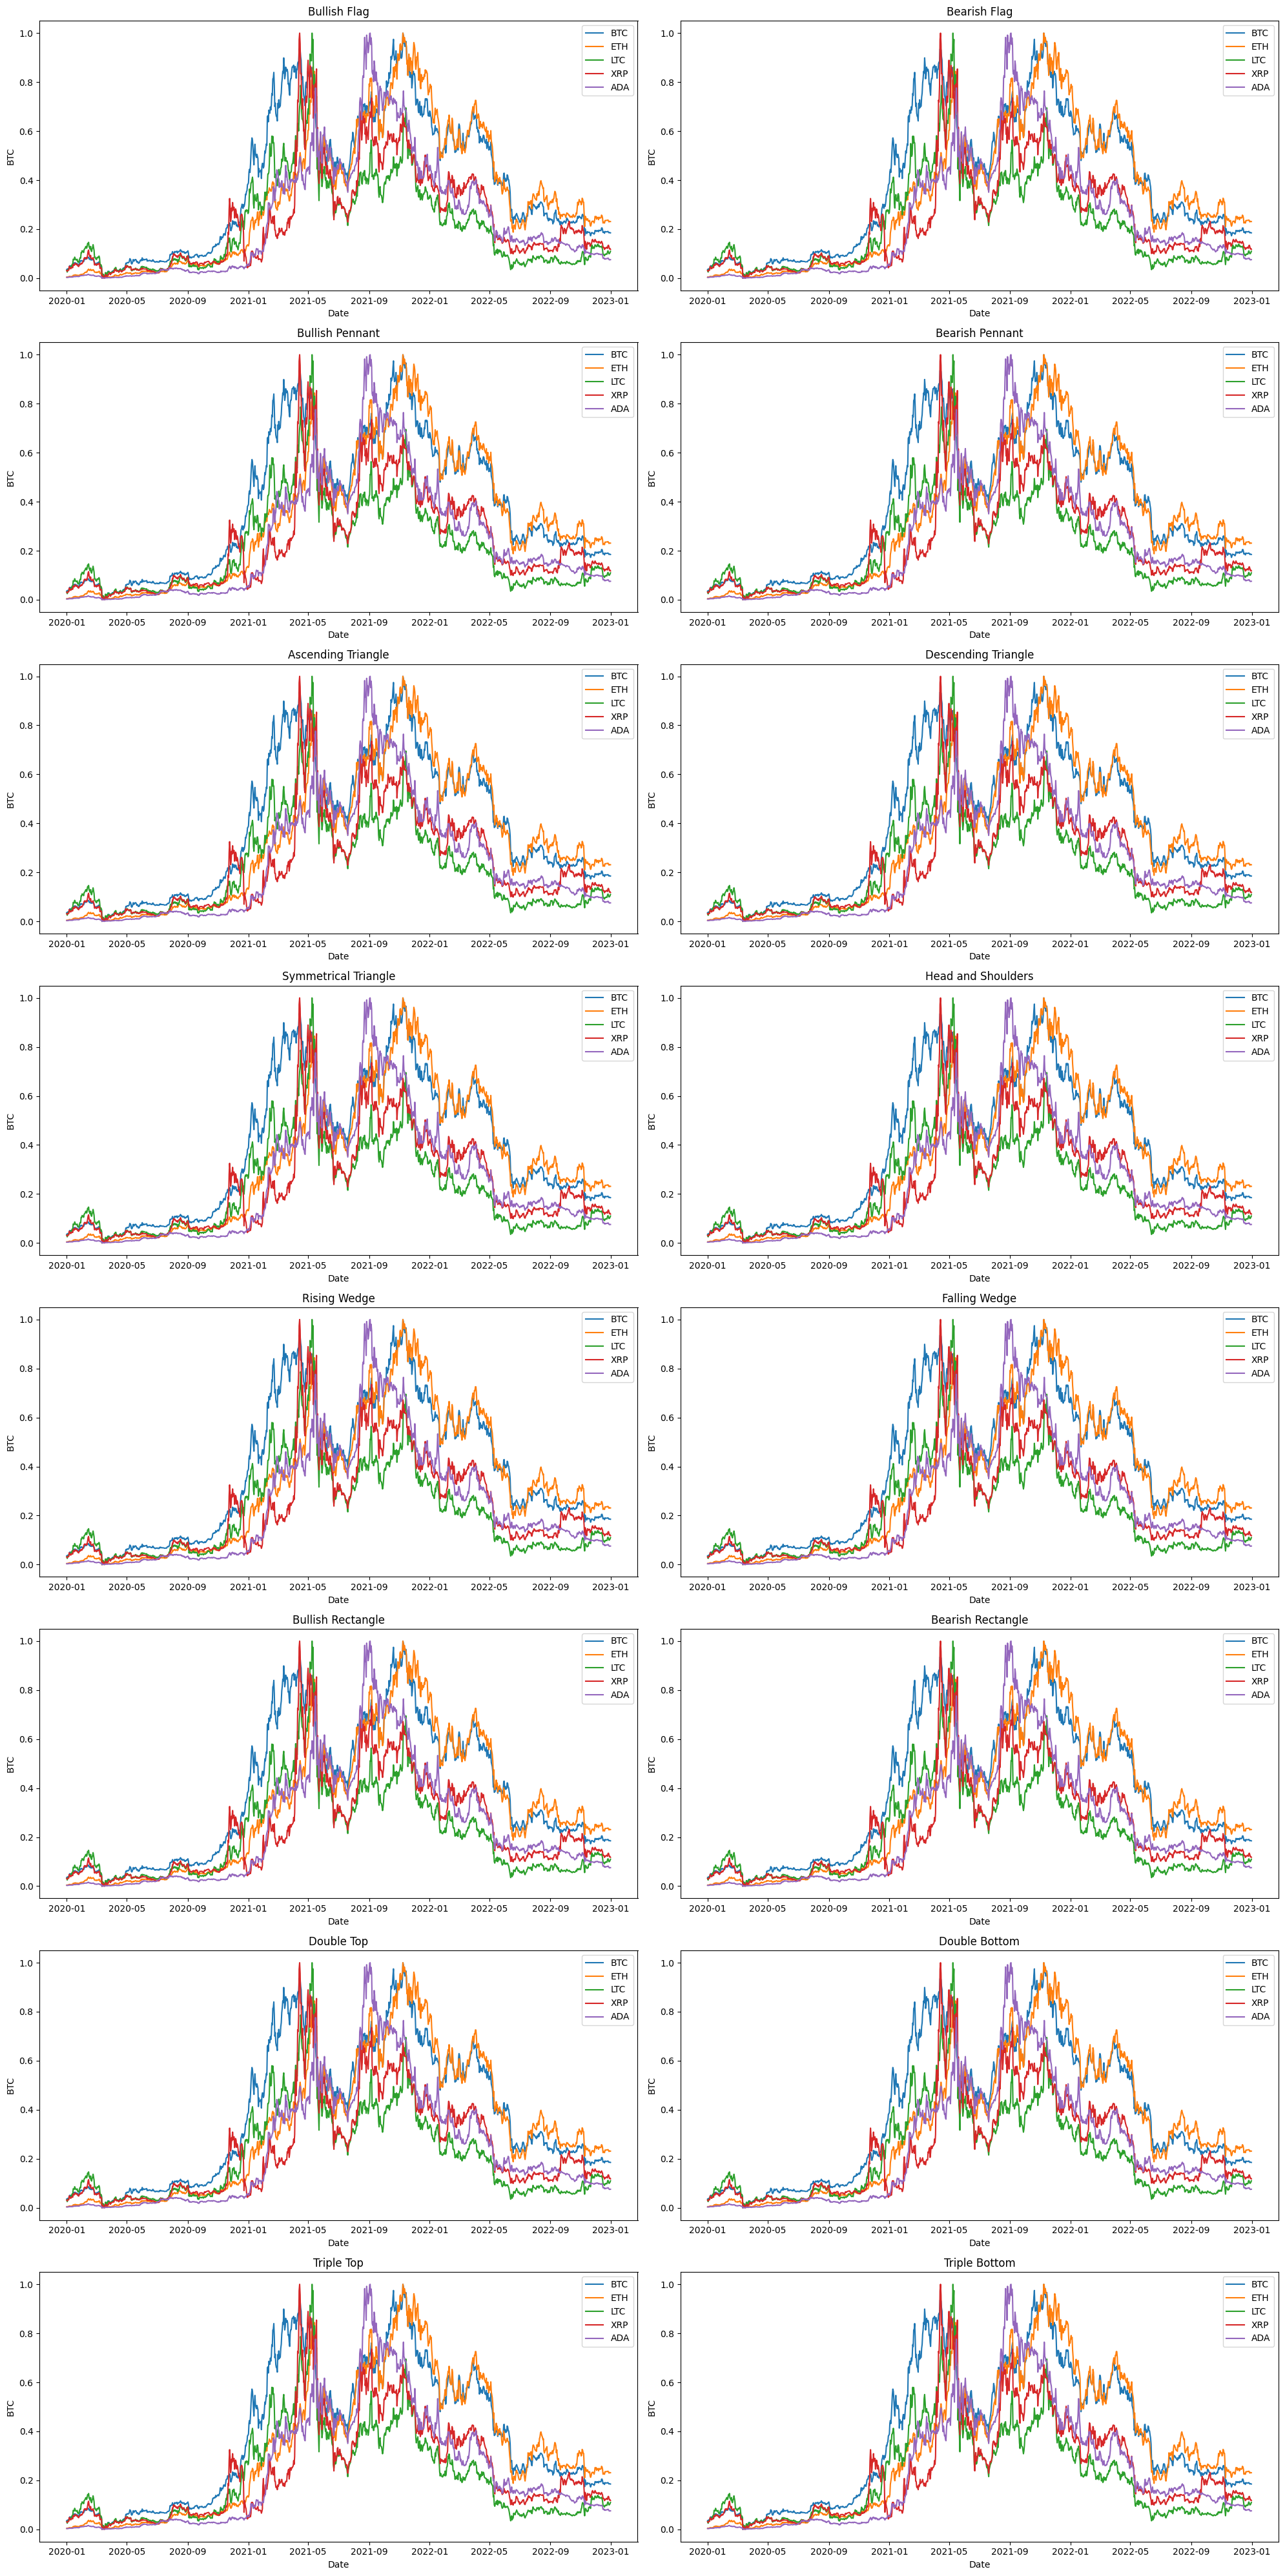

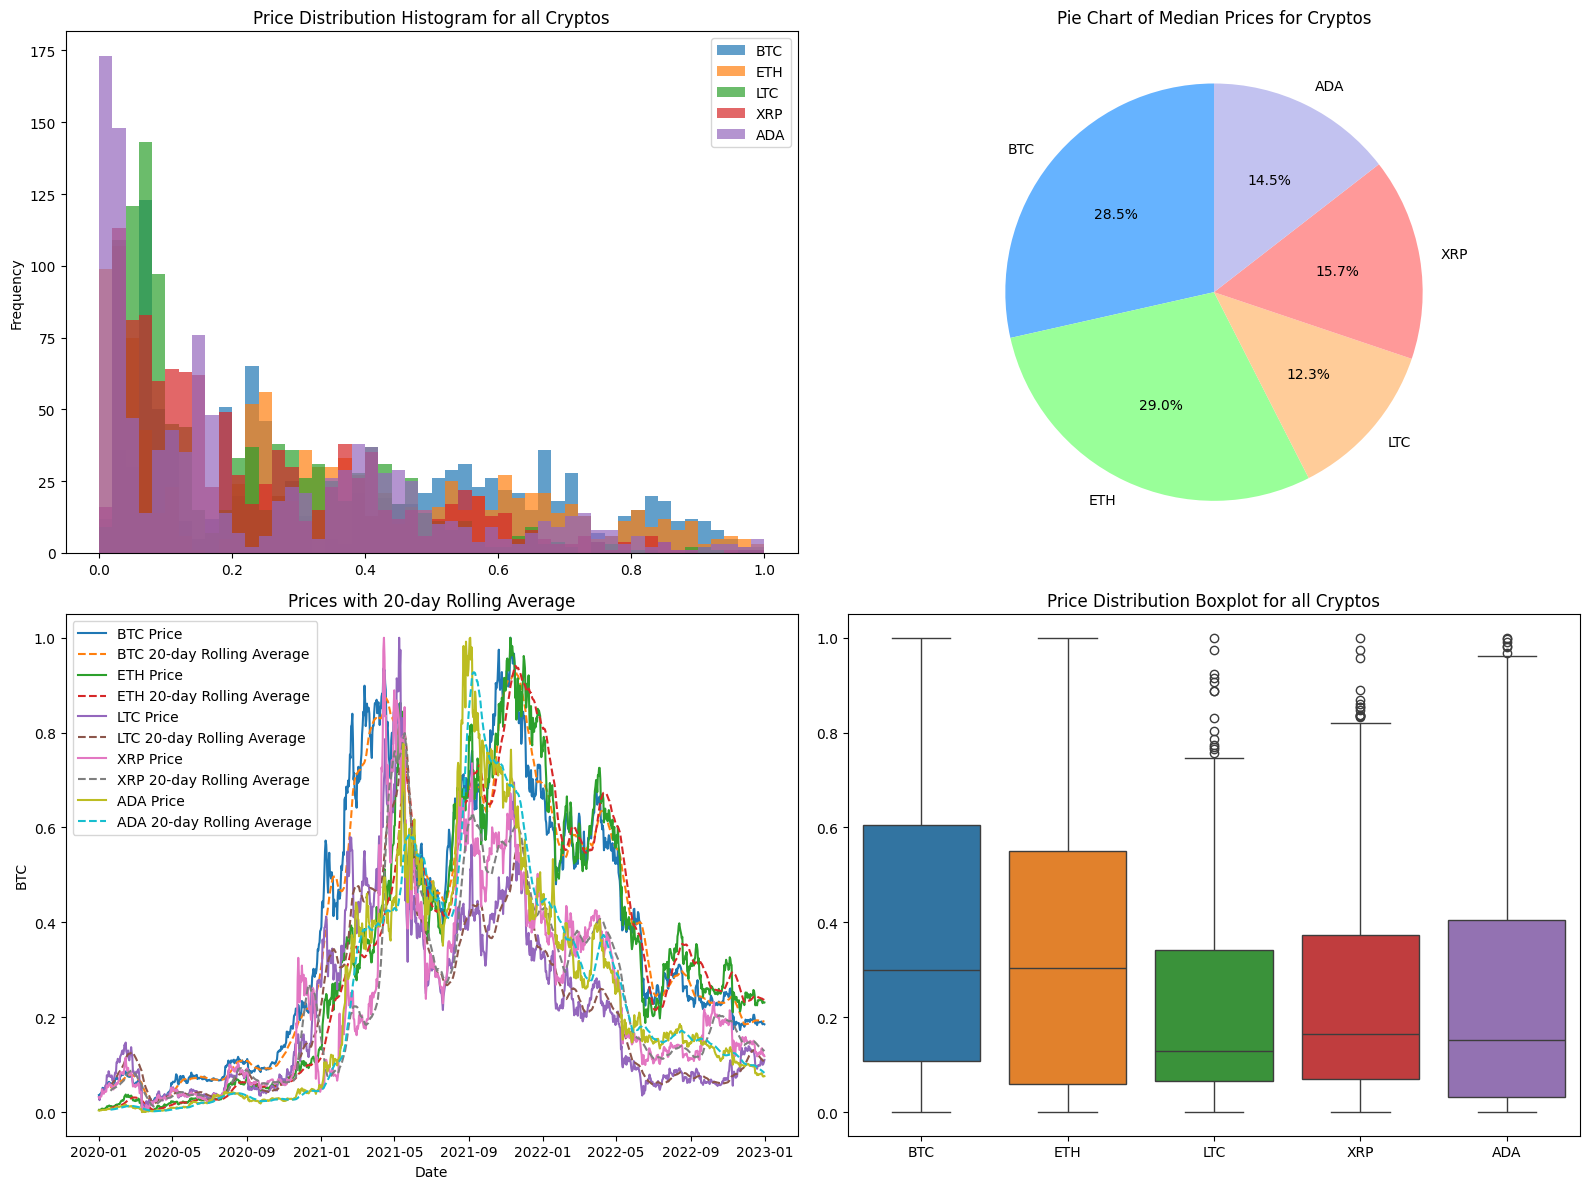

In [1]:
# Install necessary libraries
!pip install yfinance seaborn matplotlib

# Import libraries
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Function to get cryptocurrency data for multiple cryptos
def get_multiple_crypto_data(crypto_symbols, start_date, end_date):
    data = {}
    for symbol in crypto_symbols:
        data[symbol] = yf.download(symbol + "-USD", start=start_date, end=end_date)['Adj Close']
    return pd.DataFrame(data)

# Normalize data using Min-Max Scaling to bring all prices to a similar range
def normalize_data(data):
    scaler = MinMaxScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
    return scaled_data

# Plot additional charts (histogram, pie chart)
def plot_additional_charts(crypto_data):
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    # Histogram for all cryptos
    crypto_data.plot(kind='hist', bins=50, alpha=0.7, ax=axs[0, 0])
    axs[0, 0].set_title("Price Distribution Histogram for all Cryptos")

    # Pie chart: Compare median prices of all cryptos
    median_prices = crypto_data.median()
    axs[0, 1].pie(median_prices, labels=median_prices.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0'])
    axs[0, 1].set_title("Pie Chart of Median Prices for Cryptos")

    # Line chart with rolling average
    rolling_avg = crypto_data.rolling(window=20).mean()
    for column in crypto_data.columns:
        sns.lineplot(data=crypto_data[column], ax=axs[1, 0], label=f"{column} Price")
        sns.lineplot(data=rolling_avg[column], ax=axs[1, 0], label=f"{column} 20-day Rolling Average", linestyle="--")
    axs[1, 0].set_title("Prices with 20-day Rolling Average")

    # Boxplot to compare crypto prices
    sns.boxplot(data=crypto_data, ax=axs[1, 1])
    axs[1, 1].set_title("Price Distribution Boxplot for all Cryptos")

    plt.tight_layout()
    plt.show()

# Plot all chart patterns to scale using Seaborn
def plot_all_patterns(crypto_data):
    # Plotting all patterns on the same figure
    fig, axs = plt.subplots(8, 2, figsize=(20, 40))  # 8 rows, 2 columns

    # Loop through crypto symbols to plot comparison
    crypto_symbols = crypto_data.columns
    for i, symbol in enumerate(crypto_symbols):
        # Bullish Flag
        sns.lineplot(data=crypto_data[symbol], ax=axs[0, 0], label=symbol)
        axs[0, 0].set_title("Bullish Flag")

        # Bearish Flag
        sns.lineplot(data=crypto_data[symbol], ax=axs[0, 1], label=symbol)
        axs[0, 1].set_title("Bearish Flag")

        # Bullish Pennant
        sns.lineplot(data=crypto_data[symbol], ax=axs[1, 0], label=symbol)
        axs[1, 0].set_title("Bullish Pennant")

        # Bearish Pennant
        sns.lineplot(data=crypto_data[symbol], ax=axs[1, 1], label=symbol)
        axs[1, 1].set_title("Bearish Pennant")

        # Ascending Triangle
        sns.lineplot(data=crypto_data[symbol], ax=axs[2, 0], label=symbol)
        axs[2, 0].set_title("Ascending Triangle")

        # Descending Triangle
        sns.lineplot(data=crypto_data[symbol], ax=axs[2, 1], label=symbol)
        axs[2, 1].set_title("Descending Triangle")

        # Symmetrical Triangle
        sns.lineplot(data=crypto_data[symbol], ax=axs[3, 0], label=symbol)
        axs[3, 0].set_title("Symmetrical Triangle")

        # Head and Shoulders
        sns.lineplot(data=crypto_data[symbol], ax=axs[3, 1], label=symbol)
        axs[3, 1].set_title("Head and Shoulders")

        # Rising Wedge
        sns.lineplot(data=crypto_data[symbol], ax=axs[4, 0], label=symbol)
        axs[4, 0].set_title("Rising Wedge")

        # Falling Wedge
        sns.lineplot(data=crypto_data[symbol], ax=axs[4, 1], label=symbol)
        axs[4, 1].set_title("Falling Wedge")

        # Bullish Rectangle
        sns.lineplot(data=crypto_data[symbol], ax=axs[5, 0], label=symbol)
        axs[5, 0].set_title("Bullish Rectangle")

        # Bearish Rectangle
        sns.lineplot(data=crypto_data[symbol], ax=axs[5, 1], label=symbol)
        axs[5, 1].set_title("Bearish Rectangle")

        # Double Top
        sns.lineplot(data=crypto_data[symbol], ax=axs[6, 0], label=symbol)
        axs[6, 0].set_title("Double Top")

        # Double Bottom
        sns.lineplot(data=crypto_data[symbol], ax=axs[6, 1], label=symbol)
        axs[6, 1].set_title("Double Bottom")

        # Triple Top
        sns.lineplot(data=crypto_data[symbol], ax=axs[7, 0], label=symbol)
        axs[7, 0].set_title("Triple Top")

        # Triple Bottom
        sns.lineplot(data=crypto_data[symbol], ax=axs[7, 1], label=symbol)
        axs[7, 1].set_title("Triple Bottom")

    plt.tight_layout()
    plt.show()

# Main function to fetch data for multiple cryptos and plot
def crypto_analysis():
    crypto_symbols = ["BTC", "ETH", "LTC", "XRP", "ADA"]
    start_date = "2020-01-01"
    end_date = "2023-01-01"

    crypto_data = get_multiple_crypto_data(crypto_symbols, start_date, end_date)

    # Normalize the data
    normalized_crypto_data = normalize_data(crypto_data)

    plot_all_patterns(normalized_crypto_data)
    plot_additional_charts(normalized_crypto_data)

# Run the analysis
crypto_analysis()